## Plots for UTLS in different backgrounds, OsloCTM3

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
#import xesmf as xe
import glob
from matplotlib import rcParams

In [3]:
rcParams['font.size'] = 18

In [4]:
#define file locations
file_loc1 = '/div/nac/users/zofias/ACACIA/model_data/output/OsloCTM3/'
#file_loc2 = '/div/pdo/mariantl/ACACIA_AVIATE/input4rf/EMAC/aerosol_EMAC/'

#***change filename here***
filelist = sorted(glob.glob(f'{file_loc1}*C1_*vmrno*'))


In [6]:
#import data
ds_SSP1 = xr.open_mfdataset(f'{file_loc1}*C1_SSP1_vm*')
ds_SSP3 = xr.open_mfdataset(f'{file_loc1}*C1_SSP3_vm*')
ds_SSP1_SSP3BG = xr.open_mfdataset(f'{file_loc1}*C1_SSP1_SSP3BG_vm*')
ds_SSP3_SSP1BG = xr.open_mfdataset(f'{file_loc1}*C1_SSP3_SSP1BG_vm*')

ds_SSP1['lev'] = ds_SSP1['lev']/100
ds_SSP3['lev'] = ds_SSP3['lev']/100
ds_SSP1_SSP3BG['lev'] = ds_SSP1_SSP3BG['lev']/100
ds_SSP3_SSP1BG['lev'] = ds_SSP3_SSP1BG['lev']/100


ds_SSP1['vmrnox'] = ds_SSP1['vmrno'] + ds_SSP1['vmrno2']
ds_SSP3['vmrnox'] = ds_SSP3['vmrno'] + ds_SSP3['vmrno2']
ds_SSP1_SSP3BG['vmrnox'] = ds_SSP1_SSP3BG['vmrno'] + ds_SSP1_SSP3BG['vmrno2']
ds_SSP3_SSP1BG['vmrnox'] = ds_SSP3_SSP1BG['vmrno'] + ds_SSP3_SSP1BG['vmrno2']


ds_diff = ds_SSP1 - ds_SSP3
ds_diff_SSP1 = ds_SSP1 - ds_SSP1_SSP3BG
ds_diff_SSP3 = ds_SSP3_SSP1BG - ds_SSP3

### Zonal mean plots

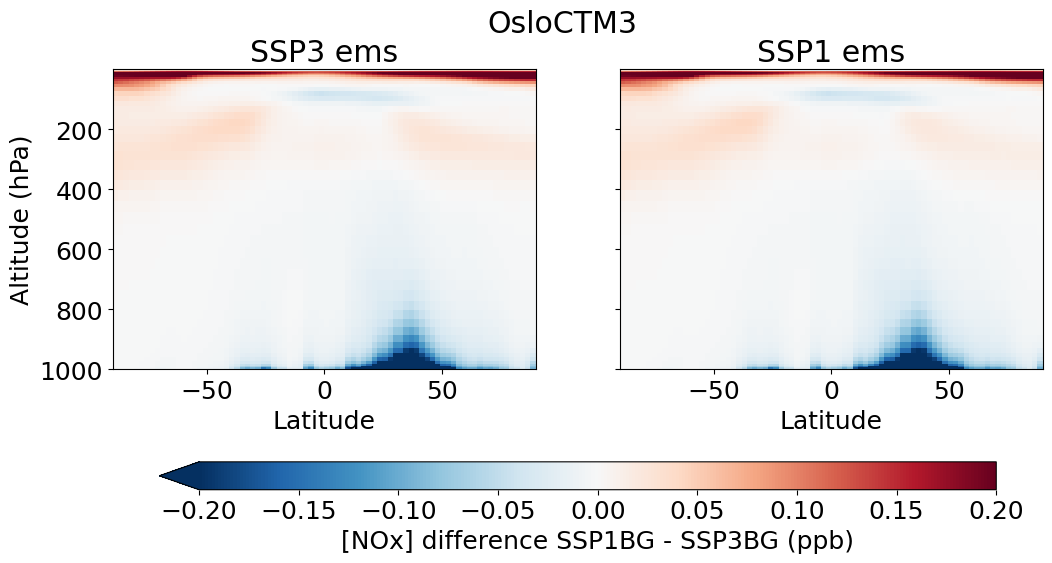

In [13]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize = (12,6),sharey=True)

im = (ds_diff_SSP3['vmrnox']*1e9).mean(dim=["time","lon"],keep_attrs=True).plot(ax=ax1,cmap = 'RdBu_r',vmax=0.2,vmin=-0.2,yincrease=False,
                                                                           add_colorbar=False)
ax1.set_title('SSP3 ems')
ax1.set_ylabel('Altitude (hPa)')
ax1.set_xlabel('Latitude')


(ds_diff_SSP1['vmrnox']*1e9).mean(dim=["time","lon"],keep_attrs=True).plot(ax=ax2,cmap = 'RdBu_r',vmax=0.2,vmin=-0.2,yincrease=False,
                                                                           add_colorbar=False)
ax2.set_title('SSP1 ems')
ax2.set_ylabel('')
ax2.set_xlabel('Latitude')


plt.suptitle('OsloCTM3')


fig.colorbar(im, ax=[ax1, ax2], orientation='horizontal', label=f"[NOx] difference SSP1BG - SSP3BG (ppb)",aspect=30,extend='min',shrink=0.9,pad=0.20)

### Plot with tropopause

In [ ]:
#zonal mean o3 for tropopause
zon_mean_o3 = ds_SSP1['vmro3'].mean(dim=["time","lon"],keep_attrs=True)*1e9

#first exceedance of 150ppb
indexes = np.array(zon_mean_o3.where(zon_mean_o3 > 125).argmin(dim='lev'))

#select lev for 150ppb index
trop_lev = np.take(ds_SSP1.lev, indexes)/100

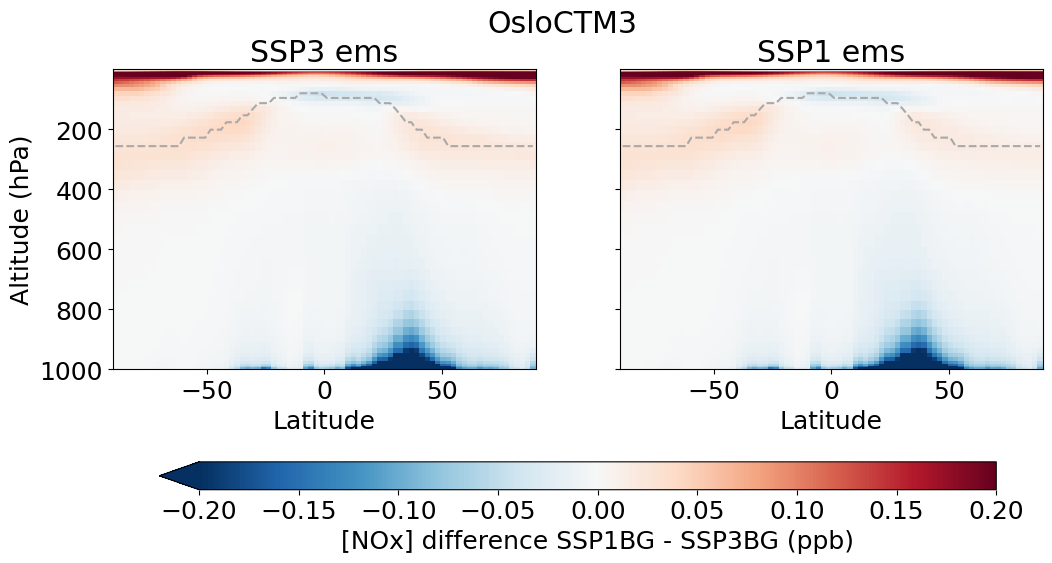

In [22]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize = (12,6),sharey=True)

im = (ds_diff_SSP3['vmrnox']*1e9).mean(dim=["time","lon"],keep_attrs=True).plot(ax=ax1,cmap = 'RdBu_r',vmax=0.2,vmin=-0.2,yincrease=False,
                                                                           add_colorbar=False)
ax1.set_title('SSP3 ems')
ax1.set_ylabel('Altitude (hPa)')
ax1.set_xlabel('Latitude')
ax1.plot(ds_SSP1.lat,trop_lev,c='darkgrey',linewidth=1.5,linestyle='--')



(ds_diff_SSP1['vmrnox']*1e9).mean(dim=["time","lon"],keep_attrs=True).plot(ax=ax2,cmap = 'RdBu_r',vmax=0.2,vmin=-0.2,yincrease=False,
                                                                           add_colorbar=False)
ax2.set_title('SSP1 ems')
ax2.set_ylabel('')
ax2.set_xlabel('Latitude')
ax2.plot(ds_SSP1.lat,trop_lev,c='darkgrey',linewidth=1.5,linestyle='--')


plt.suptitle('OsloCTM3')


fig.colorbar(im, ax=[ax1, ax2], orientation='horizontal', label=f"[NOx] difference SSP1BG - SSP3BG (ppb)",aspect=30,extend='min',shrink=0.9,pad=0.20)